A - Get the Data

In [277]:
import pandas as pd;
import os

1) Loading titanic.csv file into a data frame 

In [278]:

filename = 'titanic.csv'
titanic_achint = pd.read_csv(filename, sep=',')

B - Initial Exploration:

B) 
1 - Printing first 3 records 

In [279]:
titanic_achint.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


2 - printing the shape of DataFrame

    i.e (891, 12) means it has 891 columns ans 12 rows

In [280]:
print(titanic_achint.shape)


(891, 12)


In [281]:
print(titanic_achint.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


3 - Missing Values in each column

In [282]:
missing_values = titanic_achint.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [283]:
max_unique_count = 0
column_with_max_unique_values = None


for column in titanic_achint.columns:
    unique_count = titanic_achint[column].nunique()
    if unique_count > max_unique_count:
        max_unique_count = unique_count
        column_with_max_unique_values = column


print("Column with the most unique values:", column_with_max_unique_values)
print("Count of unique values in that column:", max_unique_count)

Column with the most unique values: PassengerId
Count of unique values in that column: 891


5 - Dislays unique values in Sex and Pclass column

In [284]:
unique_sex = titanic_achint["Sex"].unique()
unique_pclass =  titanic_achint["Pclass"].unique()

print("Unique values in the 'Sex' column:")
print(unique_sex)

print("\nUnique values in the 'Pclass' column:")
print(unique_pclass)

Unique values in the 'Sex' column:
['male' 'female']

Unique values in the 'Pclass' column:
[3 1 2]


C) Data Visualization

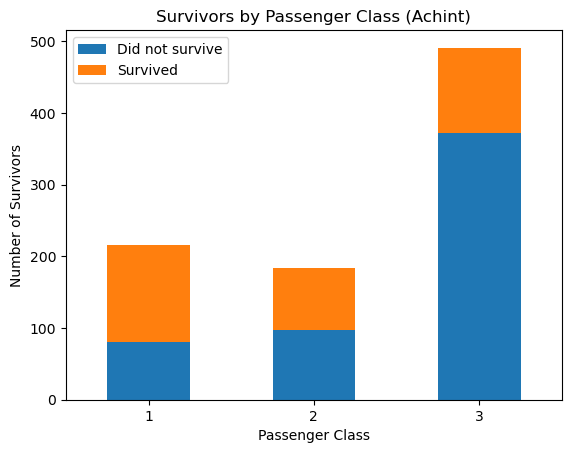

In [285]:
import matplotlib.pyplot as plt

survived_by_class = pd.crosstab(titanic_achint['Pclass'], titanic_achint['Survived'])

survived_by_class.plot(kind='bar', stacked=True)
plt.title("Survivors by Passenger Class (Achint)")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.legend(["Did not survive", "Survived"])
plt.xticks(rotation=0)  
plt.show()


a) Above bar chart shows the  number of people survived versus the passenger class.

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

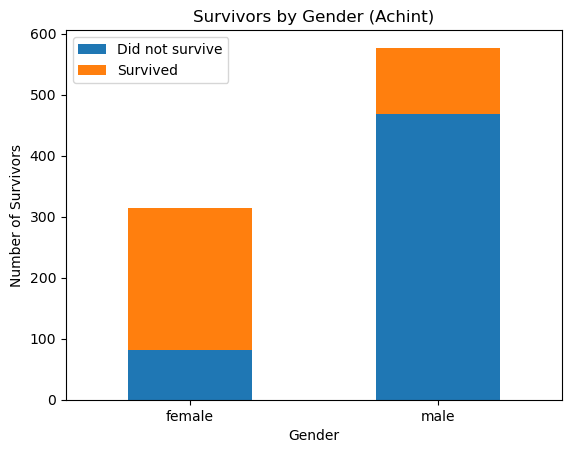

In [286]:
survived_by_gender = pd.crosstab(titanic_achint['Sex'], titanic_achint['Survived'])

survived_by_gender.plot(kind='bar', stacked=True)
plt.title("Survivors by Gender (Achint)")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.legend(["Did not survive", "Survived"])
plt.xticks(rotation=0)

a) Above bar chart shows the  number of people survived versus the Gender class.

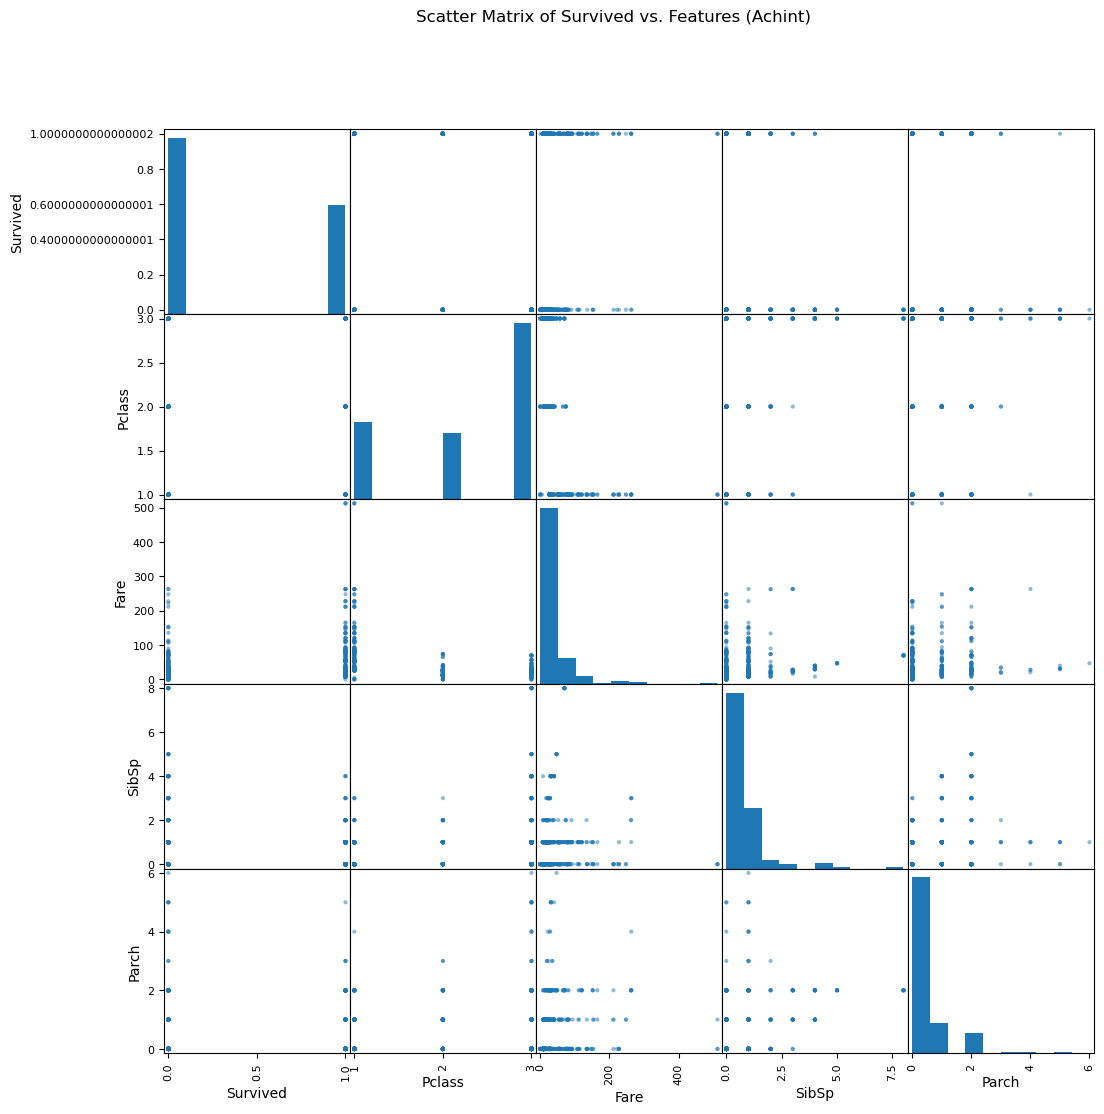

In [287]:
from pandas.plotting import scatter_matrix
selected_columns = ['Survived', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch']
selected_data = titanic_achint[selected_columns]

scatter_matrix(selected_data, alpha=0.5, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of Survived vs. Features (Achint)")

plt.show()



Above is scatter matrix to plot the relation between Survivors vs. Features 

D) Data Transformation


1 - Dropping 4 columns that are mentioned in part(b.4) which are PassengerId , Name , Ticket , Cabin.


In [288]:


columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_achint.drop(columns=columns_to_drop, inplace=True)

print(titanic_achint)


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


2 - Using "Get Dummies" transforming categorical variable in my dataframe to Numeric values.
The 2 columns are 'Sex' and 'Embarked' 

In [289]:
sex_dummies = pd.get_dummies(titanic_achint['Sex'], prefix='Sex')
embarked_dummies = pd.get_dummies(titanic_achint['Embarked'], prefix='Embarked')


3 - Concatenating new columns to the original dataframe 

In [290]:
titanic_achint = pd.concat([titanic_achint, sex_dummies, embarked_dummies], axis=1)

print(titanic_achint)


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.0      1      0   7.2500        S   
1           1       1  female  38.0      1      0  71.2833        C   
2           1       3  female  26.0      0      0   7.9250        S   
3           1       1  female  35.0      1      0  53.1000        S   
4           0       3    male  35.0      0      0   8.0500        S   
..        ...     ...     ...   ...    ...    ...      ...      ...   
886         0       2    male  27.0      0      0  13.0000        S   
887         1       1  female  19.0      0      0  30.0000        S   
888         0       3  female   NaN      1      2  23.4500        S   
889         1       1    male  26.0      0      0  30.0000        C   
890         0       3    male  32.0      0      0   7.7500        Q   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         False      True       False       False        True  
1          True    

4 - Removing the original categorical column from the dataframe.

In [291]:
titanic_achint.drop(['Sex', 'Embarked'], axis=1, inplace=True)
print(titanic_achint)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.0      1      0   7.2500       False      True   
1           1       1  38.0      1      0  71.2833        True     False   
2           1       3  26.0      0      0   7.9250        True     False   
3           1       1  35.0      1      0  53.1000        True     False   
4           0       3  35.0      0      0   8.0500       False      True   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000       False      True   
887         1       1  19.0      0      0  30.0000        True     False   
888         0       3   NaN      1      2  23.4500        True     False   
889         1       1  26.0      0      0  30.0000       False      True   
890         0       3  32.0      0      0   7.7500       False      True   

     Embarked_C  Embarked_Q  Embarked_S  
0         False       False        True  
1  

5 - Replacing the missing values in Age with mean of age

In [292]:
mean_age = titanic_achint['Age'].mean()
titanic_achint['Age'].fillna(mean_age, inplace=True)
print(titanic_achint)


     Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.000000      1      0   7.2500       False      True   
1           1       1  38.000000      1      0  71.2833        True     False   
2           1       3  26.000000      0      0   7.9250        True     False   
3           1       1  35.000000      1      0  53.1000        True     False   
4           0       3  35.000000      0      0   8.0500       False      True   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000       False      True   
887         1       1  19.000000      0      0  30.0000        True     False   
888         0       3  29.699118      1      2  23.4500        True     False   
889         1       1  26.000000      0      0  30.0000       False      True   
890         0       3  32.000000      0      0   7.7500       False      True   

     Embarked_C  Embarked_Q

6 - Changing all column types into float 

In [293]:
titanic_achint = titanic_achint.astype(float)

7 - The below shows the info about DataFrame 

In [294]:
titanic_achint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    float64
 7   Sex_male    891 non-null    float64
 8   Embarked_C  891 non-null    float64
 9   Embarked_Q  891 non-null    float64
 10  Embarked_S  891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


8 - Writing a function that takes dataframe as an argument and normalizes all the datapoints in the dataframe , using formula (x norm = ( x − x m i n ) / ( x m a x − x m i n ))

In [295]:
def normalize_dataframe(df):

     min_values = df.min()
     max_values = df.max()
     normalized_df = (df - min_values) / (max_values - min_values)

     return normalized_df


9 - Caling the new function and passing as an argument the transformed dataframe.

In [296]:
normalized_titanic = normalize_dataframe(titanic_achint)

10 - Displaying the first 2 records of the normalized Dataframe

In [297]:
print(normalized_titanic.head(2))

   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0       0.0     1.0  0.271174  0.125    0.0  0.014151         0.0       1.0   
1       1.0     0.0  0.472229  0.125    0.0  0.139136         1.0       0.0   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  


11 - Using pandas.hist to generate histogram for all the variables 

<Figure size 900x1000 with 0 Axes>

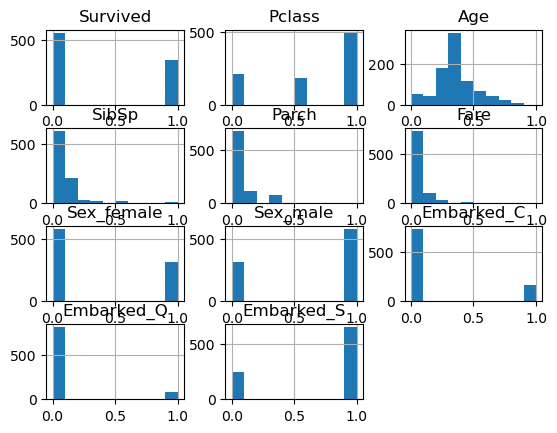

In [298]:
plt.figure(figsize=(9, 10))

normalized_titanic.hist()

plt.show()


13 - Spliting the features into a dataframe named x_achint and the target class into another dataframe named y_achint.

i) Storing the training data in a dataframe named: x_train_achint for the features (predictors) and the training labels y_train_achint. Storing the test data as
follows: x_test_achint and y_test_achint.

In [299]:
from sklearn.model_selection import train_test_split

x_achint = titanic_achint.drop(columns=['Survived'])  
y_achint = titanic_achint['Survived']  

seed = 29

x_train_achint, x_test_achint, y_train_achint, y_test_achint = train_test_split(
    x_achint, y_achint, test_size=0.3, random_state=seed)


e)Build and Validate the model

  1 - Using sklearn fit a logistic regression model to the training data. 


In [300]:
from sklearn.linear_model import LogisticRegression

achint_model = LogisticRegression()
achint_model.fit(x_train_achint, y_train_achint)

/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 2 - Displaying the coefficients (i.e. the weights of the model)

In [301]:
import numpy as np
coefficients = np.transpose(achint_model.coef_)

coefficients_df = pd.DataFrame(list(zip(x_train_achint.columns, coefficients[0])), columns=['Feature', 'Coefficient'])

print(coefficients_df)


  Feature  Coefficient
0  Pclass    -0.921088


3 - Cross Validation
1. Use Sklearn cross_val_score to validate the model on the training data.
2. Set the number of folds cv to 10.
3. Repeat the validation for different splits of the train/ test. Start at test size
10% and reach test size 50% increasing your test sample by 5%.
4. In each run print out the minimum, mean and maximum accuracy of the
score.



In [302]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of test sizes from 10% to 50% in 5% increments
test_sizes = np.arange(0.10, 0.55, 0.05)

for test_size in test_sizes:
    
    # Calculate the number of training samples based on the test size
    train_size = 1.0 - test_size

    # Perform cross-validation with 10 folds
    cv_scores = cross_val_score(achint_model, x_train_achint, y_train_achint, cv=10)

    # Calculate and print the minimum, mean, and maximum accuracy scores
    min_accuracy = cv_scores.min()
    mean_accuracy = cv_scores.mean()
    max_accuracy = cv_scores.max()

    print(f"Test Size: {test_size:.2f}")
    print(f"Min Accuracy: {min_accuracy:.4f}")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Max Accuracy: {max_accuracy:.4f}")
    print('-' * 40)



/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Test Size: 0.10
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.15
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.20
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.25
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------


/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Test Size: 0.30
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.35
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.40
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.45
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------
Test Size: 0.50
Min Accuracy: 0.6984
Mean Accuracy: 0.8028
Max Accuracy: 0.8871
----------------------------------------


/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Test the model

1. Rebuild the model using the 70% - 30% train/test split.

In [303]:
x_train_achint, x_test_achint, y_train_achint, y_test_achint = train_test_split(
    x_achint, y_achint, test_size=0.3, random_state=seed)

2. Define a new variable y_pred_firstname where firstname is your firstname, store
the predicted probabilities of the model in this variable

In [304]:
achint_model = LogisticRegression()
achint_model.fit(x_train_achint, y_train_achint)



y_pred_achint = achint_model.predict_proba(x_test_achint)


/Users/achint/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Define another variable name it y_pred_firstname_flag , store in the
y_pred_firstname after transforming the probabilities into a bolean value of true or
false based on a threshold value of 0.5. (hint : y_pred_mayy_flag = y_pred[:,1] >
0.5)

In [305]:
# Threshold for classifying as True or False
threshold = 0.5

# Transform predicted probabilities into boolean values
y_pred_achint_flag = y_pred_achint[:, 1] > threshold

4. From sklearn metrics import : confusion_matrix, accuracy_score,
classification_report
5. Print out the accuracy of the model on the test data.
6. Print out the confusion matrix.
7. Print out the classification report.

In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_achint, y_pred_achint_flag)
print(f"Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_achint, y_pred_achint_flag)
print("Confusion Matrix:")
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test_achint, y_pred_achint_flag)
print("Classification Report:")
print(class_report)

Accuracy: 0.7799
Confusion Matrix:
[[137  30]
 [ 29  72]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       167
         1.0       0.71      0.71      0.71       101

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



9. Repeat steps 3 to 6 with changing the threshold value to 0.75

In [307]:
new_threshold = 0.75

y_pred_achint_flag_new = y_pred_achint[:, 1] > new_threshold

#Calculate the accuracy of the model with the new threshold
accuracy_new = accuracy_score(y_test_achint, y_pred_achint_flag_new)
print(f"Accuracy with new threshold (0.75): {accuracy_new:.4f}")


# Generate the confusion matrix with the new threshold
conf_matrix_new = confusion_matrix(y_test_achint, y_pred_achint_flag_new)
print("Confusion Matrix with new threshold:")
print(conf_matrix_new)

# Generate the classification report with the new threshold
class_report_new = classification_report(y_test_achint, y_pred_achint_flag_new)
print("Classification Report with new threshold:")
print(class_report_new)

Accuracy with new threshold (0.75): 0.7761
Confusion Matrix with new threshold:
[[162   5]
 [ 55  46]]
Classification Report with new threshold:
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84       167
         1.0       0.90      0.46      0.61       101

    accuracy                           0.78       268
   macro avg       0.82      0.71      0.72       268
weighted avg       0.81      0.78      0.75       268



10 - Compare the accuracy on the test data with the accuracy generated using
the training data

In [308]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train_achint, achint_model.predict(x_train_achint))
print(f"Accuracy on training data: {accuracy_train:.4f}")

accuracy_test = accuracy_score(y_test_achint, y_pred_achint_flag)
print(f"Accuracy on test data: {accuracy_test:.4f}")



Accuracy on training data: 0.8042
Accuracy on test data: 0.7799


Accuracy on training data is higher than the Test data.

11 - Compare the values of accuracy, precision and re-call generated at the
threshold 0.5 and 0.75 

In [309]:
from sklearn.metrics import classification_report

# At threshold 0.5

classification_report_01 = classification_report(y_test_achint, y_pred_achint_flag, target_names=["Not Survived", "Survived"])
print("Classification Report at Threshold 0.5:")
print(classification_report_01)
print(f"Accuracy with threshold (0.5):: {accuracy:.4f}")
print('=' * 55)



# At threshold 0.75

classification_report_02 = classification_report(y_test_achint, y_pred_achint_flag_new, target_names=["Not Survived", "Survived"])
print("\nClassification Report at Threshold 0.75:")
print(classification_report_02)
print(f"Accuracy with new threshold (0.75): {accuracy_new:.4f}")


Classification Report at Threshold 0.5:
              precision    recall  f1-score   support

Not Survived       0.83      0.82      0.82       167
    Survived       0.71      0.71      0.71       101

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Accuracy with threshold (0.5):: 0.7799

Classification Report at Threshold 0.75:
              precision    recall  f1-score   support

Not Survived       0.75      0.97      0.84       167
    Survived       0.90      0.46      0.61       101

    accuracy                           0.78       268
   macro avg       0.82      0.71      0.72       268
weighted avg       0.81      0.78      0.75       268

Accuracy with new threshold (0.75): 0.7761


Threshold 0.5:
In this case, the model classifies Not Survived and Survived passengers with a threshold of 0.5. The accuracy is 77.99%, and the precision and recall for both classes are relatively balanced.

Threshold 0.75:
there is a trade-off between precision and recall. The precision for the "Not Survived" class is lower, but recall is higher, meaning that it correctly identifies more true negatives but may also classify some false positives. On the other hand, the precision for the "Survived" class is higher, but recall is lower, indicating that it correctly identifies more true positives but may also classify some false negatives.